In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pnevmoniya/sample_solution.csv
/kaggle/input/pnevmoniya/test/test_img_10340.jpeg
/kaggle/input/pnevmoniya/test/test_img_10168.jpeg
/kaggle/input/pnevmoniya/test/test_img_10613.jpeg
/kaggle/input/pnevmoniya/test/test_img_10368.jpeg
/kaggle/input/pnevmoniya/test/test_img_10036.jpeg
/kaggle/input/pnevmoniya/test/test_img_10527.jpeg
/kaggle/input/pnevmoniya/test/test_img_10020.jpeg
/kaggle/input/pnevmoniya/test/test_img_10585.jpeg
/kaggle/input/pnevmoniya/test/test_img_10276.jpeg
/kaggle/input/pnevmoniya/test/test_img_10054.jpeg
/kaggle/input/pnevmoniya/test/test_img_10298.jpeg
/kaggle/input/pnevmoniya/test/test_img_10355.jpeg
/kaggle/input/pnevmoniya/test/test_img_10511.jpeg
/kaggle/input/pnevmoniya/test/test_img_10410.jpeg
/kaggle/input/pnevmoniya/test/test_img_10096.jpeg
/kaggle/input/pnevmoniya/test/test_img_10219.jpeg
/kaggle/input/pnevmoniya/test/test_img_10057.jpeg
/kaggle/input/pnevmoniya/test/test_img_10296.jpeg
/kaggle/input/pnevmoniya/test/test_img_10407.jpeg
/kagg

In [3]:
from fastai.vision.all import *
from tqdm import tqdm

In [4]:
path = Path('/kaggle/input/pnevmoniya/train')
verify_images(path)

zip argument #1 must support iteration


(#0) []

In [7]:
datablock = DataBlock(
    blocks = (ImageBlock,CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct = 0.2, seed=42),
    get_y = parent_label,
    item_tfms = Resize(224)
)

In [9]:
dls = datablock.dataloaders(path)

In [10]:
learn = cnn_learner(dls,resnet34,metrics=accuracy)
learn.fine_tune(2)

/opt/conda/lib/python3.7/site-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/opt/conda/lib/python3.7/site-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and may be removed in the future, "
/opt/conda/lib/python3.7/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/model

  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,accuracy,time
0,0.486039,0.167289,0.947267,19:43


epoch,train_loss,valid_loss,accuracy,time
0,0.165357,0.089968,0.973154,30:32
1,0.079013,0.057151,0.983701,20:14


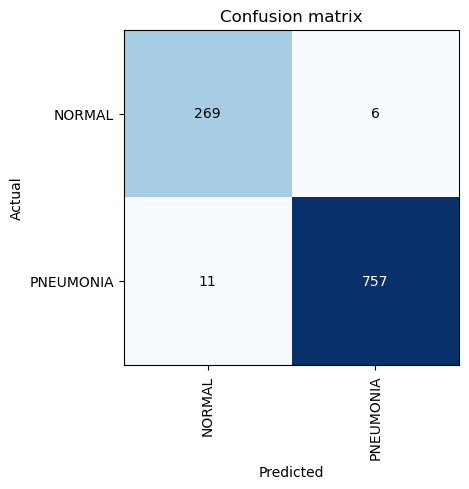

In [12]:
inter = ClassificationInterpretation.from_learner(learn)
inter.plot_confusion_matrix()

In [15]:
files = !ls "/kaggle/input/pnevmoniya/test"
p_d = [ ]
p_i = [ ]
for i in tqdm(files):
    pred, pred_id, probs = learn.predict(f"/kaggle/input/pnevmoniya/test/{i}")
    p_d.append(pred)
    p_i.append(pred_id)

  0%|          | 0/624 [00:00<?, ?it/s]

  0%|          | 1/624 [00:00<02:01,  5.14it/s]

  0%|          | 2/624 [00:00<02:26,  4.25it/s]

  0%|          | 3/624 [00:00<02:13,  4.65it/s]

  1%|          | 4/624 [00:00<01:57,  5.26it/s]

  1%|          | 5/624 [00:01<02:13,  4.64it/s]

  1%|          | 6/624 [00:01<02:02,  5.03it/s]

  1%|          | 7/624 [00:01<02:01,  5.10it/s]

  1%|▏         | 8/624 [00:01<01:53,  5.42it/s]

  1%|▏         | 9/624 [00:01<01:55,  5.31it/s]

  2%|▏         | 10/624 [00:01<01:53,  5.39it/s]

  2%|▏         | 11/624 [00:02<01:53,  5.38it/s]

  2%|▏         | 12/624 [00:02<01:49,  5.60it/s]

  2%|▏         | 13/624 [00:02<01:44,  5.86it/s]

  2%|▏         | 14/624 [00:02<01:48,  5.64it/s]

  2%|▏         | 15/624 [00:02<01:53,  5.36it/s]

  3%|▎         | 16/624 [00:03<01:48,  5.59it/s]

  3%|▎         | 17/624 [00:03<01:42,  5.90it/s]

  3%|▎         | 18/624 [00:03<01:50,  5.48it/s]

  3%|▎         | 19/624 [00:03<01:46,  5.70it/s]

  3%|▎         | 20/624 [00:03<01:59,  5.05it/s]

  3%|▎         | 21/624 [00:03<01:57,  5.11it/s]

  4%|▎         | 22/624 [00:04<01:53,  5.28it/s]

  4%|▎         | 23/624 [00:04<01:52,  5.33it/s]

  4%|▍         | 24/624 [00:04<01:52,  5.32it/s]

  4%|▍         | 25/624 [00:04<01:49,  5.47it/s]

  4%|▍         | 26/624 [00:04<01:46,  5.61it/s]

  4%|▍         | 27/624 [00:05<01:47,  5.54it/s]

  4%|▍         | 28/624 [00:05<01:47,  5.53it/s]

  5%|▍         | 29/624 [00:05<01:47,  5.54it/s]

  5%|▍         | 30/624 [00:05<01:47,  5.55it/s]

  5%|▍         | 31/624 [00:05<01:45,  5.62it/s]

  5%|▌         | 32/624 [00:05<01:39,  5.93it/s]

  5%|▌         | 33/624 [00:06<01:39,  5.96it/s]

  5%|▌         | 34/624 [00:06<01:35,  6.15it/s]

  6%|▌         | 35/624 [00:06<01:36,  6.08it/s]

  6%|▌         | 36/624 [00:06<01:36,  6.09it/s]

  6%|▌         | 37/624 [00:06<01:41,  5.79it/s]

  6%|▌         | 38/624 [00:06<01:40,  5.85it/s]

  6%|▋         | 39/624 [00:07<01:37,  6.00it/s]

  6%|▋         | 40/624 [00:07<01:41,  5.77it/s]

  7%|▋         | 41/624 [00:07<01:38,  5.91it/s]

  7%|▋         | 42/624 [00:07<01:45,  5.53it/s]

  7%|▋         | 43/624 [00:07<01:40,  5.78it/s]

  7%|▋         | 44/624 [00:07<01:46,  5.46it/s]

  7%|▋         | 45/624 [00:08<01:42,  5.64it/s]

  7%|▋         | 46/624 [00:08<01:43,  5.59it/s]

  8%|▊         | 47/624 [00:08<01:49,  5.25it/s]

  8%|▊         | 48/624 [00:08<01:45,  5.45it/s]

  8%|▊         | 49/624 [00:08<01:48,  5.29it/s]

  8%|▊         | 50/624 [00:09<01:44,  5.51it/s]

  8%|▊         | 51/624 [00:09<01:52,  5.08it/s]

  8%|▊         | 52/624 [00:09<01:48,  5.27it/s]

  8%|▊         | 53/624 [00:09<01:52,  5.07it/s]

  9%|▊         | 54/624 [00:09<01:47,  5.30it/s]

  9%|▉         | 55/624 [00:10<01:44,  5.44it/s]

  9%|▉         | 56/624 [00:10<01:40,  5.67it/s]

  9%|▉         | 57/624 [00:10<01:36,  5.85it/s]

  9%|▉         | 58/624 [00:10<01:48,  5.22it/s]

  9%|▉         | 59/624 [00:10<01:42,  5.49it/s]

 10%|▉         | 60/624 [00:10<01:48,  5.19it/s]

 10%|▉         | 61/624 [00:11<01:42,  5.49it/s]

 10%|▉         | 62/624 [00:11<01:43,  5.45it/s]

 10%|█         | 63/624 [00:11<01:39,  5.62it/s]

 10%|█         | 64/624 [00:11<01:42,  5.45it/s]

 10%|█         | 65/624 [00:11<01:40,  5.57it/s]

 11%|█         | 66/624 [00:12<01:42,  5.46it/s]

 11%|█         | 67/624 [00:12<01:37,  5.71it/s]

 11%|█         | 68/624 [00:12<01:36,  5.75it/s]

 11%|█         | 69/624 [00:12<01:46,  5.20it/s]

 11%|█         | 70/624 [00:12<01:39,  5.57it/s]

 11%|█▏        | 71/624 [00:12<01:41,  5.47it/s]

 12%|█▏        | 72/624 [00:13<01:39,  5.52it/s]

 12%|█▏        | 73/624 [00:13<01:37,  5.67it/s]

 12%|█▏        | 74/624 [00:13<01:31,  6.00it/s]

 12%|█▏        | 75/624 [00:13<01:34,  5.78it/s]

 12%|█▏        | 76/624 [00:13<01:31,  6.01it/s]

 12%|█▏        | 77/624 [00:13<01:35,  5.74it/s]

 12%|█▎        | 78/624 [00:14<01:31,  5.94it/s]

 13%|█▎        | 79/624 [00:14<01:29,  6.09it/s]

 13%|█▎        | 80/624 [00:14<01:31,  5.98it/s]

 13%|█▎        | 81/624 [00:14<01:27,  6.21it/s]

 13%|█▎        | 82/624 [00:14<01:37,  5.55it/s]

 13%|█▎        | 83/624 [00:14<01:35,  5.68it/s]

 13%|█▎        | 84/624 [00:15<01:35,  5.63it/s]

 14%|█▎        | 85/624 [00:15<01:29,  6.01it/s]

 14%|█▍        | 86/624 [00:15<01:27,  6.17it/s]

 14%|█▍        | 87/624 [00:15<01:24,  6.32it/s]

 14%|█▍        | 88/624 [00:15<01:23,  6.41it/s]

 14%|█▍        | 89/624 [00:15<01:25,  6.25it/s]

 14%|█▍        | 90/624 [00:16<01:25,  6.23it/s]

 15%|█▍        | 91/624 [00:16<01:28,  5.99it/s]

 15%|█▍        | 92/624 [00:16<01:27,  6.10it/s]

 15%|█▍        | 93/624 [00:16<01:27,  6.08it/s]

 15%|█▌        | 94/624 [00:16<01:29,  5.90it/s]

 15%|█▌        | 95/624 [00:16<01:35,  5.55it/s]

 15%|█▌        | 96/624 [00:17<01:37,  5.44it/s]

 16%|█▌        | 97/624 [00:17<01:42,  5.14it/s]

 16%|█▌        | 98/624 [00:17<01:43,  5.06it/s]

 16%|█▌        | 99/624 [00:17<01:38,  5.33it/s]

 16%|█▌        | 100/624 [00:17<01:33,  5.59it/s]

 16%|█▌        | 101/624 [00:18<01:32,  5.68it/s]

 16%|█▋        | 102/624 [00:18<01:33,  5.61it/s]

 17%|█▋        | 103/624 [00:18<01:29,  5.80it/s]

 17%|█▋        | 104/624 [00:18<01:29,  5.78it/s]

 17%|█▋        | 105/624 [00:18<01:28,  5.86it/s]

 17%|█▋        | 106/624 [00:19<01:42,  5.07it/s]

 17%|█▋        | 107/624 [00:19<01:36,  5.35it/s]

 17%|█▋        | 108/624 [00:19<01:45,  4.91it/s]

 17%|█▋        | 109/624 [00:19<01:35,  5.40it/s]

 18%|█▊        | 110/624 [00:19<01:35,  5.39it/s]

 18%|█▊        | 111/624 [00:19<01:28,  5.78it/s]

 18%|█▊        | 112/624 [00:20<01:33,  5.45it/s]

 18%|█▊        | 113/624 [00:20<01:32,  5.54it/s]

 18%|█▊        | 114/624 [00:20<01:32,  5.52it/s]

 18%|█▊        | 115/624 [00:20<01:28,  5.75it/s]

 19%|█▊        | 116/624 [00:20<01:24,  6.02it/s]

 19%|█▉        | 117/624 [00:20<01:20,  6.29it/s]

 19%|█▉        | 118/624 [00:21<01:26,  5.87it/s]

 19%|█▉        | 119/624 [00:21<01:22,  6.09it/s]

 19%|█▉        | 120/624 [00:21<01:26,  5.85it/s]

 19%|█▉        | 121/624 [00:21<01:22,  6.07it/s]

 20%|█▉        | 122/624 [00:21<01:19,  6.29it/s]

 20%|█▉        | 123/624 [00:21<01:18,  6.39it/s]

 20%|█▉        | 124/624 [00:22<01:17,  6.48it/s]

 20%|██        | 125/624 [00:22<01:20,  6.16it/s]

 20%|██        | 126/624 [00:22<01:23,  5.93it/s]

 20%|██        | 127/624 [00:22<01:25,  5.84it/s]

 21%|██        | 128/624 [00:22<01:22,  6.03it/s]

 21%|██        | 129/624 [00:22<01:28,  5.61it/s]

 21%|██        | 130/624 [00:23<01:27,  5.67it/s]

 21%|██        | 131/624 [00:23<01:27,  5.64it/s]

 21%|██        | 132/624 [00:23<01:21,  6.00it/s]

 21%|██▏       | 133/624 [00:23<01:18,  6.24it/s]

 21%|██▏       | 134/624 [00:23<01:20,  6.09it/s]

 22%|██▏       | 135/624 [00:23<01:22,  5.95it/s]

 22%|██▏       | 136/624 [00:24<01:28,  5.49it/s]

 22%|██▏       | 137/624 [00:24<01:25,  5.72it/s]

 22%|██▏       | 138/624 [00:24<01:32,  5.28it/s]

 22%|██▏       | 139/624 [00:24<01:26,  5.64it/s]

 22%|██▏       | 140/624 [00:24<01:23,  5.82it/s]

 23%|██▎       | 141/624 [00:25<01:19,  6.05it/s]

 23%|██▎       | 142/624 [00:25<01:22,  5.85it/s]

 23%|██▎       | 143/624 [00:25<01:23,  5.75it/s]

 23%|██▎       | 144/624 [00:25<01:21,  5.90it/s]

 23%|██▎       | 145/624 [00:25<01:17,  6.16it/s]

 23%|██▎       | 146/624 [00:25<01:18,  6.10it/s]

 24%|██▎       | 147/624 [00:26<01:20,  5.94it/s]

 24%|██▎       | 148/624 [00:26<01:18,  6.10it/s]

 24%|██▍       | 149/624 [00:26<01:19,  5.94it/s]

 24%|██▍       | 150/624 [00:26<01:20,  5.89it/s]

 24%|██▍       | 151/624 [00:26<01:19,  5.94it/s]

 24%|██▍       | 152/624 [00:26<01:17,  6.08it/s]

 25%|██▍       | 153/624 [00:27<01:16,  6.14it/s]

 25%|██▍       | 154/624 [00:27<01:14,  6.33it/s]

 25%|██▍       | 155/624 [00:27<01:14,  6.26it/s]

 25%|██▌       | 156/624 [00:27<01:14,  6.32it/s]

 25%|██▌       | 157/624 [00:27<01:14,  6.24it/s]

 25%|██▌       | 158/624 [00:27<01:15,  6.20it/s]

 25%|██▌       | 159/624 [00:27<01:13,  6.34it/s]

 26%|██▌       | 160/624 [00:28<01:22,  5.64it/s]

 26%|██▌       | 161/624 [00:28<01:28,  5.25it/s]

 26%|██▌       | 162/624 [00:28<01:40,  4.58it/s]

 26%|██▌       | 163/624 [00:28<01:40,  4.58it/s]

 26%|██▋       | 164/624 [00:29<01:43,  4.42it/s]

 26%|██▋       | 165/624 [00:29<01:41,  4.53it/s]

 27%|██▋       | 166/624 [00:29<01:40,  4.57it/s]

 27%|██▋       | 167/624 [00:29<01:31,  5.01it/s]

 27%|██▋       | 168/624 [00:29<01:24,  5.42it/s]

 27%|██▋       | 169/624 [00:30<01:22,  5.51it/s]

 27%|██▋       | 170/624 [00:30<01:17,  5.84it/s]

 27%|██▋       | 171/624 [00:30<01:15,  5.97it/s]

 28%|██▊       | 172/624 [00:30<01:12,  6.22it/s]

 28%|██▊       | 173/624 [00:30<01:14,  6.08it/s]

 28%|██▊       | 174/624 [00:30<01:11,  6.31it/s]

 28%|██▊       | 175/624 [00:30<01:15,  5.95it/s]

 28%|██▊       | 176/624 [00:31<01:12,  6.16it/s]

 28%|██▊       | 177/624 [00:31<01:19,  5.64it/s]

 29%|██▊       | 178/624 [00:31<01:18,  5.65it/s]

 29%|██▊       | 179/624 [00:31<01:21,  5.48it/s]

 29%|██▉       | 180/624 [00:31<01:18,  5.63it/s]

 29%|██▉       | 181/624 [00:32<01:17,  5.69it/s]

 29%|██▉       | 182/624 [00:32<01:19,  5.57it/s]

 29%|██▉       | 183/624 [00:32<01:17,  5.66it/s]

 29%|██▉       | 184/624 [00:32<01:23,  5.30it/s]

 30%|██▉       | 185/624 [00:32<01:17,  5.63it/s]

 30%|██▉       | 186/624 [00:32<01:14,  5.85it/s]

 30%|██▉       | 187/624 [00:33<01:14,  5.90it/s]

 30%|███       | 188/624 [00:33<01:13,  5.92it/s]

 30%|███       | 189/624 [00:33<01:10,  6.14it/s]

 30%|███       | 190/624 [00:33<01:09,  6.20it/s]

 31%|███       | 191/624 [00:33<01:08,  6.29it/s]

 31%|███       | 192/624 [00:33<01:08,  6.34it/s]

 31%|███       | 193/624 [00:34<01:20,  5.32it/s]

 31%|███       | 194/624 [00:34<01:15,  5.66it/s]

 31%|███▏      | 195/624 [00:34<01:20,  5.35it/s]

 31%|███▏      | 196/624 [00:34<01:15,  5.70it/s]

 32%|███▏      | 197/624 [00:34<01:14,  5.76it/s]

 32%|███▏      | 198/624 [00:34<01:11,  5.93it/s]

 32%|███▏      | 199/624 [00:35<01:15,  5.64it/s]

 32%|███▏      | 200/624 [00:35<01:13,  5.78it/s]

 32%|███▏      | 201/624 [00:35<01:14,  5.70it/s]

 32%|███▏      | 202/624 [00:35<01:12,  5.86it/s]

 33%|███▎      | 203/624 [00:35<01:09,  6.04it/s]

 33%|███▎      | 204/624 [00:36<01:15,  5.59it/s]

 33%|███▎      | 205/624 [00:36<01:14,  5.64it/s]

 33%|███▎      | 206/624 [00:36<01:18,  5.33it/s]

 33%|███▎      | 207/624 [00:36<01:15,  5.53it/s]

 33%|███▎      | 208/624 [00:36<01:12,  5.71it/s]

 33%|███▎      | 209/624 [00:36<01:14,  5.61it/s]

 34%|███▎      | 210/624 [00:37<01:23,  4.95it/s]

 34%|███▍      | 211/624 [00:37<01:18,  5.27it/s]

 34%|███▍      | 212/624 [00:37<01:14,  5.51it/s]

 34%|███▍      | 213/624 [00:37<01:18,  5.22it/s]

 34%|███▍      | 214/624 [00:37<01:12,  5.67it/s]

 34%|███▍      | 215/624 [00:38<01:18,  5.20it/s]

 35%|███▍      | 216/624 [00:38<01:12,  5.63it/s]

 35%|███▍      | 217/624 [00:38<01:12,  5.64it/s]

 35%|███▍      | 218/624 [00:38<01:10,  5.79it/s]

 35%|███▌      | 219/624 [00:38<01:13,  5.48it/s]

 35%|███▌      | 220/624 [00:38<01:10,  5.77it/s]

 35%|███▌      | 221/624 [00:39<01:19,  5.10it/s]

 36%|███▌      | 222/624 [00:39<01:15,  5.36it/s]

 36%|███▌      | 223/624 [00:39<01:10,  5.66it/s]

 36%|███▌      | 224/624 [00:39<01:11,  5.57it/s]

 36%|███▌      | 225/624 [00:39<01:08,  5.85it/s]

 36%|███▌      | 226/624 [00:40<01:04,  6.13it/s]

 36%|███▋      | 227/624 [00:40<01:10,  5.65it/s]

 37%|███▋      | 228/624 [00:40<01:10,  5.63it/s]

 37%|███▋      | 229/624 [00:40<01:08,  5.76it/s]

 37%|███▋      | 230/624 [00:40<01:07,  5.81it/s]

 37%|███▋      | 231/624 [00:40<01:11,  5.53it/s]

 37%|███▋      | 232/624 [00:41<01:08,  5.72it/s]

 37%|███▋      | 233/624 [00:41<01:08,  5.69it/s]

 38%|███▊      | 234/624 [00:41<01:04,  6.04it/s]

 38%|███▊      | 235/624 [00:41<01:02,  6.27it/s]

 38%|███▊      | 236/624 [00:41<01:09,  5.58it/s]

 38%|███▊      | 237/624 [00:41<01:06,  5.85it/s]

 38%|███▊      | 238/624 [00:42<01:09,  5.52it/s]

 38%|███▊      | 239/624 [00:42<01:08,  5.62it/s]

 38%|███▊      | 240/624 [00:42<01:13,  5.23it/s]

 39%|███▊      | 241/624 [00:42<01:10,  5.43it/s]

 39%|███▉      | 242/624 [00:42<01:10,  5.45it/s]

 39%|███▉      | 243/624 [00:43<01:07,  5.68it/s]

 39%|███▉      | 244/624 [00:43<01:07,  5.63it/s]

 39%|███▉      | 245/624 [00:43<01:02,  6.04it/s]

 39%|███▉      | 246/624 [00:43<01:02,  6.02it/s]

 40%|███▉      | 247/624 [00:43<01:07,  5.60it/s]

 40%|███▉      | 248/624 [00:43<01:03,  5.91it/s]

 40%|███▉      | 249/624 [00:44<01:12,  5.14it/s]

 40%|████      | 250/624 [00:44<01:07,  5.51it/s]

 40%|████      | 251/624 [00:44<01:04,  5.75it/s]

 40%|████      | 252/624 [00:44<01:02,  5.96it/s]

 41%|████      | 253/624 [00:44<01:00,  6.11it/s]

 41%|████      | 254/624 [00:44<00:59,  6.22it/s]

 41%|████      | 255/624 [00:45<00:59,  6.25it/s]

 41%|████      | 256/624 [00:45<00:58,  6.28it/s]

 41%|████      | 257/624 [00:45<00:58,  6.28it/s]

 41%|████▏     | 258/624 [00:45<01:04,  5.65it/s]

 42%|████▏     | 259/624 [00:45<01:00,  6.03it/s]

 42%|████▏     | 260/624 [00:45<00:58,  6.18it/s]

 42%|████▏     | 261/624 [00:46<00:58,  6.25it/s]

 42%|████▏     | 262/624 [00:46<00:59,  6.12it/s]

 42%|████▏     | 263/624 [00:46<00:57,  6.32it/s]

 42%|████▏     | 264/624 [00:46<00:58,  6.17it/s]

 42%|████▏     | 265/624 [00:46<00:57,  6.29it/s]

 43%|████▎     | 266/624 [00:46<01:05,  5.45it/s]

 43%|████▎     | 267/624 [00:47<01:01,  5.77it/s]

 43%|████▎     | 268/624 [00:47<01:04,  5.52it/s]

 43%|████▎     | 269/624 [00:47<01:07,  5.30it/s]

 43%|████▎     | 270/624 [00:47<01:02,  5.65it/s]

 43%|████▎     | 271/624 [00:47<01:03,  5.59it/s]

 44%|████▎     | 272/624 [00:47<01:00,  5.80it/s]

 44%|████▍     | 273/624 [00:48<00:59,  5.93it/s]

 44%|████▍     | 274/624 [00:48<00:56,  6.24it/s]

 44%|████▍     | 275/624 [00:48<00:56,  6.16it/s]

 44%|████▍     | 276/624 [00:48<00:55,  6.28it/s]

 44%|████▍     | 277/624 [00:48<01:05,  5.28it/s]

 45%|████▍     | 278/624 [00:48<01:00,  5.72it/s]

 45%|████▍     | 279/624 [00:49<00:57,  5.96it/s]

 45%|████▍     | 280/624 [00:49<00:57,  6.01it/s]

 45%|████▌     | 281/624 [00:49<00:54,  6.30it/s]

 45%|████▌     | 282/624 [00:49<00:59,  5.72it/s]

 45%|████▌     | 283/624 [00:49<00:55,  6.09it/s]

 46%|████▌     | 284/624 [00:49<00:54,  6.22it/s]

 46%|████▌     | 285/624 [00:50<00:52,  6.47it/s]

 46%|████▌     | 286/624 [00:50<00:59,  5.68it/s]

 46%|████▌     | 287/624 [00:50<00:56,  5.95it/s]

 46%|████▌     | 288/624 [00:50<00:55,  6.06it/s]

 46%|████▋     | 289/624 [00:50<00:52,  6.32it/s]

 46%|████▋     | 290/624 [00:50<00:59,  5.58it/s]

 47%|████▋     | 291/624 [00:51<00:58,  5.73it/s]

 47%|████▋     | 292/624 [00:51<00:57,  5.81it/s]

 47%|████▋     | 293/624 [00:51<00:58,  5.62it/s]

 47%|████▋     | 294/624 [00:51<00:59,  5.52it/s]

 47%|████▋     | 295/624 [00:51<01:00,  5.42it/s]

 47%|████▋     | 296/624 [00:52<00:56,  5.78it/s]

 48%|████▊     | 297/624 [00:52<00:56,  5.83it/s]

 48%|████▊     | 298/624 [00:52<00:53,  6.10it/s]

 48%|████▊     | 299/624 [00:52<00:52,  6.16it/s]

 48%|████▊     | 300/624 [00:52<00:51,  6.32it/s]

 48%|████▊     | 301/624 [00:52<00:50,  6.42it/s]

 48%|████▊     | 302/624 [00:53<00:58,  5.51it/s]

 49%|████▊     | 303/624 [00:53<00:54,  5.86it/s]

 49%|████▊     | 304/624 [00:53<00:53,  6.02it/s]

 49%|████▉     | 305/624 [00:53<00:52,  6.11it/s]

 49%|████▉     | 306/624 [00:53<00:57,  5.52it/s]

 49%|████▉     | 307/624 [00:53<00:53,  5.88it/s]

 49%|████▉     | 308/624 [00:54<00:55,  5.70it/s]

 50%|████▉     | 309/624 [00:54<00:51,  6.10it/s]

 50%|████▉     | 310/624 [00:54<00:54,  5.72it/s]

 50%|████▉     | 311/624 [00:54<00:54,  5.78it/s]

 50%|█████     | 312/624 [00:54<00:51,  6.01it/s]

 50%|█████     | 313/624 [00:54<00:49,  6.24it/s]

 50%|█████     | 314/624 [00:55<00:47,  6.49it/s]

 50%|█████     | 315/624 [00:55<00:51,  6.01it/s]

 51%|█████     | 316/624 [00:55<00:50,  6.09it/s]

 51%|█████     | 317/624 [00:55<00:50,  6.06it/s]

 51%|█████     | 318/624 [00:55<00:50,  6.11it/s]

 51%|█████     | 319/624 [00:55<00:55,  5.54it/s]

 51%|█████▏    | 320/624 [00:56<00:52,  5.81it/s]

 51%|█████▏    | 321/624 [00:56<00:51,  5.89it/s]

 52%|█████▏    | 322/624 [00:56<00:48,  6.19it/s]

 52%|█████▏    | 323/624 [00:56<00:48,  6.27it/s]

 52%|█████▏    | 324/624 [00:56<00:49,  6.04it/s]

 52%|█████▏    | 325/624 [00:56<00:48,  6.21it/s]

 52%|█████▏    | 326/624 [00:57<00:50,  5.89it/s]

 52%|█████▏    | 327/624 [00:57<00:47,  6.24it/s]

 53%|█████▎    | 328/624 [00:57<00:48,  6.09it/s]

 53%|█████▎    | 329/624 [00:57<00:47,  6.23it/s]

 53%|█████▎    | 330/624 [00:57<00:47,  6.24it/s]

 53%|█████▎    | 331/624 [00:57<00:45,  6.39it/s]

 53%|█████▎    | 332/624 [00:58<00:47,  6.10it/s]

 53%|█████▎    | 333/624 [00:58<00:46,  6.25it/s]

 54%|█████▎    | 334/624 [00:58<00:57,  5.03it/s]

 54%|█████▎    | 335/624 [00:58<00:57,  5.03it/s]

 54%|█████▍    | 336/624 [00:58<00:57,  5.05it/s]

 54%|█████▍    | 337/624 [00:59<00:54,  5.26it/s]

 54%|█████▍    | 338/624 [00:59<00:53,  5.32it/s]

 54%|█████▍    | 339/624 [00:59<00:49,  5.78it/s]

 54%|█████▍    | 340/624 [00:59<00:54,  5.21it/s]

 55%|█████▍    | 341/624 [00:59<00:54,  5.17it/s]

 55%|█████▍    | 342/624 [01:00<00:59,  4.76it/s]

 55%|█████▍    | 343/624 [01:00<00:57,  4.90it/s]

 55%|█████▌    | 344/624 [01:00<01:02,  4.45it/s]

 55%|█████▌    | 345/624 [01:00<01:00,  4.61it/s]

 55%|█████▌    | 346/624 [01:00<00:57,  4.80it/s]

 56%|█████▌    | 347/624 [01:01<00:55,  4.99it/s]

 56%|█████▌    | 348/624 [01:01<00:50,  5.45it/s]

 56%|█████▌    | 349/624 [01:01<00:48,  5.73it/s]

 56%|█████▌    | 350/624 [01:01<00:45,  6.05it/s]

 56%|█████▋    | 351/624 [01:01<00:49,  5.55it/s]

 56%|█████▋    | 352/624 [01:01<00:45,  5.93it/s]

 57%|█████▋    | 353/624 [01:02<00:46,  5.86it/s]

 57%|█████▋    | 354/624 [01:02<00:43,  6.26it/s]

 57%|█████▋    | 355/624 [01:02<00:43,  6.25it/s]

 57%|█████▋    | 356/624 [01:02<00:41,  6.42it/s]

 57%|█████▋    | 357/624 [01:02<00:42,  6.33it/s]

 57%|█████▋    | 358/624 [01:02<00:44,  6.01it/s]

 58%|█████▊    | 359/624 [01:02<00:43,  6.11it/s]

 58%|█████▊    | 360/624 [01:03<00:50,  5.24it/s]

 58%|█████▊    | 361/624 [01:03<00:47,  5.59it/s]

 58%|█████▊    | 362/624 [01:03<00:44,  5.82it/s]

 58%|█████▊    | 363/624 [01:03<00:42,  6.11it/s]

 58%|█████▊    | 364/624 [01:03<00:43,  6.04it/s]

 58%|█████▊    | 365/624 [01:03<00:40,  6.36it/s]

 59%|█████▊    | 366/624 [01:04<00:40,  6.32it/s]

 59%|█████▉    | 367/624 [01:04<00:39,  6.51it/s]

 59%|█████▉    | 368/624 [01:04<00:40,  6.30it/s]

 59%|█████▉    | 369/624 [01:04<00:44,  5.73it/s]

 59%|█████▉    | 370/624 [01:04<00:42,  5.94it/s]

 59%|█████▉    | 371/624 [01:05<00:44,  5.65it/s]

 60%|█████▉    | 372/624 [01:05<00:42,  5.89it/s]

 60%|█████▉    | 373/624 [01:05<00:43,  5.81it/s]

 60%|█████▉    | 374/624 [01:05<00:41,  6.00it/s]

 60%|██████    | 375/624 [01:05<00:41,  5.98it/s]

 60%|██████    | 376/624 [01:05<00:40,  6.16it/s]

 60%|██████    | 377/624 [01:05<00:40,  6.15it/s]

 61%|██████    | 378/624 [01:06<00:40,  6.14it/s]

 61%|██████    | 379/624 [01:06<00:45,  5.40it/s]

 61%|██████    | 380/624 [01:06<00:44,  5.51it/s]

 61%|██████    | 381/624 [01:06<00:42,  5.71it/s]

 61%|██████    | 382/624 [01:06<00:44,  5.49it/s]

 61%|██████▏   | 383/624 [01:07<00:41,  5.86it/s]

 62%|██████▏   | 384/624 [01:07<00:39,  6.06it/s]

 62%|██████▏   | 385/624 [01:07<00:37,  6.30it/s]

 62%|██████▏   | 386/624 [01:07<00:40,  5.89it/s]

 62%|██████▏   | 387/624 [01:07<00:39,  6.02it/s]

 62%|██████▏   | 388/624 [01:07<00:40,  5.84it/s]

 62%|██████▏   | 389/624 [01:08<00:38,  6.11it/s]

 62%|██████▎   | 390/624 [01:08<00:36,  6.38it/s]

 63%|██████▎   | 391/624 [01:08<00:39,  5.94it/s]

 63%|██████▎   | 392/624 [01:08<00:37,  6.14it/s]

 63%|██████▎   | 393/624 [01:08<00:38,  5.95it/s]

 63%|██████▎   | 394/624 [01:08<00:38,  6.04it/s]

 63%|██████▎   | 395/624 [01:09<00:38,  6.02it/s]

 63%|██████▎   | 396/624 [01:09<00:37,  6.11it/s]

 64%|██████▎   | 397/624 [01:09<00:41,  5.49it/s]

 64%|██████▍   | 398/624 [01:09<00:39,  5.68it/s]

 64%|██████▍   | 399/624 [01:09<00:46,  4.81it/s]

 64%|██████▍   | 400/624 [01:10<00:43,  5.13it/s]

 64%|██████▍   | 401/624 [01:10<00:41,  5.37it/s]

 64%|██████▍   | 402/624 [01:10<00:40,  5.49it/s]

 65%|██████▍   | 403/624 [01:10<00:38,  5.77it/s]

 65%|██████▍   | 404/624 [01:10<00:38,  5.67it/s]

 65%|██████▍   | 405/624 [01:10<00:36,  5.96it/s]

 65%|██████▌   | 406/624 [01:11<00:38,  5.60it/s]

 65%|██████▌   | 407/624 [01:11<00:36,  5.90it/s]

 65%|██████▌   | 408/624 [01:11<00:36,  5.94it/s]

 66%|██████▌   | 409/624 [01:11<00:34,  6.26it/s]

 66%|██████▌   | 410/624 [01:11<00:35,  5.95it/s]

 66%|██████▌   | 411/624 [01:11<00:34,  6.15it/s]

 66%|██████▌   | 412/624 [01:11<00:33,  6.31it/s]

 66%|██████▌   | 413/624 [01:12<00:33,  6.39it/s]

 66%|██████▋   | 414/624 [01:12<00:32,  6.44it/s]

 67%|██████▋   | 415/624 [01:12<00:32,  6.48it/s]

 67%|██████▋   | 416/624 [01:12<00:31,  6.59it/s]

 67%|██████▋   | 417/624 [01:12<00:31,  6.59it/s]

 67%|██████▋   | 418/624 [01:12<00:34,  6.02it/s]

 67%|██████▋   | 419/624 [01:13<00:33,  6.10it/s]

 67%|██████▋   | 420/624 [01:13<00:33,  6.17it/s]

 67%|██████▋   | 421/624 [01:13<00:32,  6.23it/s]

 68%|██████▊   | 422/624 [01:13<00:32,  6.20it/s]

 68%|██████▊   | 423/624 [01:13<00:32,  6.14it/s]

 68%|██████▊   | 424/624 [01:13<00:32,  6.18it/s]

 68%|██████▊   | 425/624 [01:14<00:31,  6.27it/s]

 68%|██████▊   | 426/624 [01:14<00:31,  6.22it/s]

 68%|██████▊   | 427/624 [01:14<00:32,  6.09it/s]

 69%|██████▊   | 428/624 [01:14<00:32,  5.95it/s]

 69%|██████▉   | 429/624 [01:14<00:31,  6.22it/s]

 69%|██████▉   | 430/624 [01:14<00:31,  6.23it/s]

 69%|██████▉   | 431/624 [01:15<00:31,  6.06it/s]

 69%|██████▉   | 432/624 [01:15<00:31,  6.05it/s]

 69%|██████▉   | 433/624 [01:15<00:30,  6.29it/s]

 70%|██████▉   | 434/624 [01:15<00:30,  6.32it/s]

 70%|██████▉   | 435/624 [01:15<00:30,  6.25it/s]

 70%|██████▉   | 436/624 [01:15<00:30,  6.11it/s]

 70%|███████   | 437/624 [01:16<00:31,  6.03it/s]

 70%|███████   | 438/624 [01:16<00:31,  5.97it/s]

 70%|███████   | 439/624 [01:16<00:30,  6.07it/s]

 71%|███████   | 440/624 [01:16<00:29,  6.16it/s]

 71%|███████   | 441/624 [01:16<00:29,  6.17it/s]

 71%|███████   | 442/624 [01:16<00:28,  6.38it/s]

 71%|███████   | 443/624 [01:17<00:32,  5.64it/s]

 71%|███████   | 444/624 [01:17<00:30,  5.95it/s]

 71%|███████▏  | 445/624 [01:17<00:28,  6.19it/s]

 71%|███████▏  | 446/624 [01:17<00:27,  6.37it/s]

 72%|███████▏  | 447/624 [01:17<00:27,  6.51it/s]

 72%|███████▏  | 448/624 [01:17<00:26,  6.69it/s]

 72%|███████▏  | 449/624 [01:17<00:25,  6.76it/s]

 72%|███████▏  | 450/624 [01:18<00:25,  6.83it/s]

 72%|███████▏  | 451/624 [01:18<00:25,  6.84it/s]

 72%|███████▏  | 452/624 [01:18<00:25,  6.78it/s]

 73%|███████▎  | 453/624 [01:18<00:25,  6.70it/s]

 73%|███████▎  | 454/624 [01:18<00:25,  6.68it/s]

 73%|███████▎  | 455/624 [01:18<00:25,  6.56it/s]

 73%|███████▎  | 456/624 [01:18<00:25,  6.49it/s]

 73%|███████▎  | 457/624 [01:19<00:25,  6.43it/s]

 73%|███████▎  | 458/624 [01:19<00:25,  6.49it/s]

 74%|███████▎  | 459/624 [01:19<00:25,  6.59it/s]

 74%|███████▎  | 460/624 [01:19<00:24,  6.63it/s]

 74%|███████▍  | 461/624 [01:19<00:25,  6.34it/s]

 74%|███████▍  | 462/624 [01:19<00:25,  6.41it/s]

 74%|███████▍  | 463/624 [01:20<00:25,  6.31it/s]

 74%|███████▍  | 464/624 [01:20<00:25,  6.34it/s]

 75%|███████▍  | 465/624 [01:20<00:26,  6.02it/s]

 75%|███████▍  | 466/624 [01:20<00:25,  6.13it/s]

 75%|███████▍  | 467/624 [01:20<00:27,  5.79it/s]

 75%|███████▌  | 468/624 [01:20<00:26,  5.82it/s]

 75%|███████▌  | 469/624 [01:21<00:26,  5.96it/s]

 75%|███████▌  | 470/624 [01:21<00:25,  6.06it/s]

 75%|███████▌  | 471/624 [01:21<00:25,  5.99it/s]

 76%|███████▌  | 472/624 [01:21<00:25,  6.06it/s]

 76%|███████▌  | 473/624 [01:21<00:25,  5.94it/s]

 76%|███████▌  | 474/624 [01:21<00:24,  6.17it/s]

 76%|███████▌  | 475/624 [01:22<00:23,  6.39it/s]

 76%|███████▋  | 476/624 [01:22<00:22,  6.51it/s]

 76%|███████▋  | 477/624 [01:22<00:22,  6.54it/s]

 77%|███████▋  | 478/624 [01:22<00:22,  6.61it/s]

 77%|███████▋  | 479/624 [01:22<00:22,  6.57it/s]

 77%|███████▋  | 480/624 [01:22<00:21,  6.70it/s]

 77%|███████▋  | 481/624 [01:22<00:21,  6.58it/s]

 77%|███████▋  | 482/624 [01:23<00:21,  6.57it/s]

 77%|███████▋  | 483/624 [01:23<00:21,  6.44it/s]

 78%|███████▊  | 484/624 [01:23<00:21,  6.44it/s]

 78%|███████▊  | 485/624 [01:23<00:21,  6.60it/s]

 78%|███████▊  | 486/624 [01:23<00:21,  6.56it/s]

 78%|███████▊  | 487/624 [01:23<00:21,  6.46it/s]

 78%|███████▊  | 488/624 [01:24<00:21,  6.42it/s]

 78%|███████▊  | 489/624 [01:24<00:20,  6.53it/s]

 79%|███████▊  | 490/624 [01:24<00:20,  6.52it/s]

 79%|███████▊  | 491/624 [01:24<00:21,  6.21it/s]

 79%|███████▉  | 492/624 [01:24<00:23,  5.52it/s]

 79%|███████▉  | 493/624 [01:24<00:22,  5.78it/s]

 79%|███████▉  | 494/624 [01:25<00:21,  6.03it/s]

 79%|███████▉  | 495/624 [01:25<00:20,  6.23it/s]

 79%|███████▉  | 496/624 [01:25<00:20,  6.33it/s]

 80%|███████▉  | 497/624 [01:25<00:20,  6.32it/s]

 80%|███████▉  | 498/624 [01:25<00:19,  6.40it/s]

 80%|███████▉  | 499/624 [01:25<00:19,  6.39it/s]

 80%|████████  | 500/624 [01:25<00:19,  6.38it/s]

 80%|████████  | 501/624 [01:26<00:19,  6.47it/s]

 80%|████████  | 502/624 [01:26<00:18,  6.48it/s]

 81%|████████  | 503/624 [01:26<00:18,  6.49it/s]

 81%|████████  | 504/624 [01:26<00:18,  6.45it/s]

 81%|████████  | 505/624 [01:26<00:18,  6.37it/s]

 81%|████████  | 506/624 [01:26<00:18,  6.34it/s]

 81%|████████▏ | 507/624 [01:27<00:18,  6.22it/s]

 81%|████████▏ | 508/624 [01:27<00:18,  6.38it/s]

 82%|████████▏ | 509/624 [01:27<00:17,  6.45it/s]

 82%|████████▏ | 510/624 [01:27<00:17,  6.54it/s]

 82%|████████▏ | 511/624 [01:27<00:17,  6.60it/s]

 82%|████████▏ | 512/624 [01:27<00:17,  6.54it/s]

 82%|████████▏ | 513/624 [01:28<00:17,  6.19it/s]

 82%|████████▏ | 514/624 [01:28<00:17,  6.22it/s]

 83%|████████▎ | 515/624 [01:28<00:17,  6.20it/s]

 83%|████████▎ | 516/624 [01:28<00:17,  6.25it/s]

 83%|████████▎ | 517/624 [01:28<00:16,  6.44it/s]

 83%|████████▎ | 518/624 [01:28<00:16,  6.52it/s]

 83%|████████▎ | 519/624 [01:28<00:15,  6.63it/s]

 83%|████████▎ | 520/624 [01:29<00:15,  6.75it/s]

 83%|████████▎ | 521/624 [01:29<00:15,  6.72it/s]

 84%|████████▎ | 522/624 [01:29<00:15,  6.45it/s]

 84%|████████▍ | 523/624 [01:29<00:15,  6.55it/s]

 84%|████████▍ | 524/624 [01:29<00:15,  6.60it/s]

 84%|████████▍ | 525/624 [01:29<00:14,  6.72it/s]

 84%|████████▍ | 526/624 [01:29<00:15,  6.48it/s]

 84%|████████▍ | 527/624 [01:30<00:15,  6.42it/s]

 85%|████████▍ | 528/624 [01:30<00:15,  6.28it/s]

 85%|████████▍ | 529/624 [01:30<00:15,  6.30it/s]

 85%|████████▍ | 530/624 [01:30<00:14,  6.44it/s]

 85%|████████▌ | 531/624 [01:30<00:14,  6.61it/s]

 85%|████████▌ | 532/624 [01:30<00:13,  6.68it/s]

 85%|████████▌ | 533/624 [01:31<00:13,  6.55it/s]

 86%|████████▌ | 534/624 [01:31<00:16,  5.54it/s]

 86%|████████▌ | 535/624 [01:31<00:18,  4.91it/s]

 86%|████████▌ | 536/624 [01:31<00:18,  4.77it/s]

 86%|████████▌ | 537/624 [01:32<00:19,  4.48it/s]

 86%|████████▌ | 538/624 [01:32<00:19,  4.38it/s]

 86%|████████▋ | 539/624 [01:32<00:18,  4.64it/s]

 87%|████████▋ | 540/624 [01:32<00:17,  4.93it/s]

 87%|████████▋ | 541/624 [01:32<00:15,  5.30it/s]

 87%|████████▋ | 542/624 [01:32<00:14,  5.68it/s]

 87%|████████▋ | 543/624 [01:33<00:13,  6.00it/s]

 87%|████████▋ | 544/624 [01:33<00:12,  6.27it/s]

 87%|████████▋ | 545/624 [01:33<00:12,  6.56it/s]

 88%|████████▊ | 546/624 [01:33<00:11,  6.65it/s]

 88%|████████▊ | 547/624 [01:33<00:11,  6.73it/s]

 88%|████████▊ | 548/624 [01:33<00:11,  6.71it/s]

 88%|████████▊ | 549/624 [01:33<00:11,  6.78it/s]

 88%|████████▊ | 550/624 [01:34<00:10,  6.87it/s]

 88%|████████▊ | 551/624 [01:34<00:10,  6.89it/s]

 88%|████████▊ | 552/624 [01:34<00:10,  6.74it/s]

 89%|████████▊ | 553/624 [01:34<00:10,  6.61it/s]

 89%|████████▉ | 554/624 [01:34<00:10,  6.55it/s]

 89%|████████▉ | 555/624 [01:34<00:10,  6.62it/s]

 89%|████████▉ | 556/624 [01:35<00:10,  6.40it/s]

 89%|████████▉ | 557/624 [01:35<00:11,  6.08it/s]

 89%|████████▉ | 558/624 [01:35<00:10,  6.11it/s]

 90%|████████▉ | 559/624 [01:35<00:11,  5.87it/s]

 90%|████████▉ | 560/624 [01:35<00:10,  5.98it/s]

 90%|████████▉ | 561/624 [01:35<00:10,  5.89it/s]

 90%|█████████ | 562/624 [01:36<00:10,  5.85it/s]

 90%|█████████ | 563/624 [01:36<00:10,  5.94it/s]

 90%|█████████ | 564/624 [01:36<00:09,  6.02it/s]

 91%|█████████ | 565/624 [01:36<00:09,  6.07it/s]

 91%|█████████ | 566/624 [01:36<00:09,  6.06it/s]

 91%|█████████ | 567/624 [01:36<00:09,  6.13it/s]

 91%|█████████ | 568/624 [01:37<00:09,  6.21it/s]

 91%|█████████ | 569/624 [01:37<00:09,  5.96it/s]

 91%|█████████▏| 570/624 [01:37<00:08,  6.06it/s]

 92%|█████████▏| 571/624 [01:37<00:08,  6.23it/s]

 92%|█████████▏| 572/624 [01:37<00:08,  6.19it/s]

 92%|█████████▏| 573/624 [01:37<00:08,  6.29it/s]

 92%|█████████▏| 574/624 [01:37<00:07,  6.41it/s]

 92%|█████████▏| 575/624 [01:38<00:07,  6.44it/s]

 92%|█████████▏| 576/624 [01:38<00:07,  6.47it/s]

 92%|█████████▏| 577/624 [01:38<00:07,  6.53it/s]

 93%|█████████▎| 578/624 [01:38<00:07,  6.37it/s]

 93%|█████████▎| 579/624 [01:38<00:06,  6.50it/s]

 93%|█████████▎| 580/624 [01:38<00:06,  6.59it/s]

 93%|█████████▎| 581/624 [01:39<00:06,  6.73it/s]

 93%|█████████▎| 582/624 [01:39<00:06,  6.79it/s]

 93%|█████████▎| 583/624 [01:39<00:05,  6.87it/s]

 94%|█████████▎| 584/624 [01:39<00:05,  6.86it/s]

 94%|█████████▍| 585/624 [01:39<00:05,  6.65it/s]

 94%|█████████▍| 586/624 [01:39<00:05,  6.44it/s]

 94%|█████████▍| 587/624 [01:39<00:05,  6.23it/s]

 94%|█████████▍| 588/624 [01:40<00:05,  6.34it/s]

 94%|█████████▍| 589/624 [01:40<00:05,  6.50it/s]

 95%|█████████▍| 590/624 [01:40<00:05,  6.47it/s]

 95%|█████████▍| 591/624 [01:40<00:05,  6.57it/s]

 95%|█████████▍| 592/624 [01:40<00:04,  6.67it/s]

 95%|█████████▌| 593/624 [01:40<00:04,  6.80it/s]

 95%|█████████▌| 594/624 [01:41<00:04,  6.94it/s]

 95%|█████████▌| 595/624 [01:41<00:04,  6.79it/s]

 96%|█████████▌| 596/624 [01:41<00:04,  6.54it/s]

 96%|█████████▌| 597/624 [01:41<00:04,  6.59it/s]

 96%|█████████▌| 598/624 [01:41<00:03,  6.52it/s]

 96%|█████████▌| 599/624 [01:41<00:03,  6.39it/s]

 96%|█████████▌| 600/624 [01:41<00:03,  6.51it/s]

 96%|█████████▋| 601/624 [01:42<00:04,  5.64it/s]

 96%|█████████▋| 602/624 [01:42<00:04,  5.36it/s]

 97%|█████████▋| 603/624 [01:42<00:04,  5.06it/s]

 97%|█████████▋| 604/624 [01:42<00:04,  4.34it/s]

 97%|█████████▋| 605/624 [01:43<00:03,  4.78it/s]

 97%|█████████▋| 606/624 [01:43<00:03,  5.02it/s]

 97%|█████████▋| 607/624 [01:43<00:03,  5.35it/s]

 97%|█████████▋| 608/624 [01:43<00:03,  5.33it/s]

 98%|█████████▊| 609/624 [01:43<00:02,  5.62it/s]

 98%|█████████▊| 610/624 [01:43<00:02,  5.16it/s]

 98%|█████████▊| 611/624 [01:44<00:02,  5.34it/s]

 98%|█████████▊| 612/624 [01:44<00:02,  5.22it/s]

 98%|█████████▊| 613/624 [01:44<00:02,  5.35it/s]

 98%|█████████▊| 614/624 [01:44<00:01,  5.67it/s]

 99%|█████████▊| 615/624 [01:44<00:01,  5.79it/s]

 99%|█████████▊| 616/624 [01:45<00:01,  5.89it/s]

 99%|█████████▉| 617/624 [01:45<00:01,  5.20it/s]

 99%|█████████▉| 618/624 [01:45<00:01,  5.49it/s]

 99%|█████████▉| 619/624 [01:45<00:00,  5.48it/s]

 99%|█████████▉| 620/624 [01:45<00:00,  5.65it/s]

100%|█████████▉| 621/624 [01:46<00:00,  4.96it/s]

100%|█████████▉| 622/624 [01:46<00:00,  5.33it/s]

100%|█████████▉| 623/624 [01:46<00:00,  5.62it/s]

100%|██████████| 624/624 [01:46<00:00,  5.86it/s]


In [19]:
df = pd.read_csv("/kaggle/input/pnevmoniya/sample_solution.csv")
df['labels'] = p_i

In [20]:
df

,id,labels
0,test_img_10001.jpeg,TensorBase(1)
1,test_img_10002.jpeg,TensorBase(0)
2,test_img_10003.jpeg,TensorBase(0)
3,test_img_10004.jpeg,TensorBase(1)
4,test_img_10005.jpeg,TensorBase(0)
...,...,...
619,test_img_10620.jpeg,TensorBase(1)
620,test_img_10621.jpeg,TensorBase(0)
621,test_img_10622.jpeg,TensorBase(1)
622,test_img_10623.jpeg,TensorBase(1)
